In [41]:
import librosa 
import librosa.display
import mir_eval
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [42]:
import os
import glob
from scipy.io import wavfile
import librosa.display

In [43]:
A = [] 
# load more files with librosa


In [44]:
pathAudio_1 = "C:/Users/Hari/ds/control"
files = librosa.util.find_files(pathAudio_1, ext=['wav']) 
files = np.asarray(files)

In [45]:
for y in files:
    X, sr = librosa.load(y)
    A.append(( y))

In [46]:
len(A)

6

In [47]:
pathAudio_2 = "C:/Users/Hari/ds/pathology"
files = librosa.util.find_files(pathAudio_2, ext=['wav']) 
files = np.asarray(files)


In [48]:
B=[]

In [49]:
for y in files:
    Y, sr = librosa.load(y)
    B.append(( y))

In [50]:
len(B)

6

In [52]:
Audio(data=X,rate=sr)

In [53]:
Audio(data=Y,rate=sr)

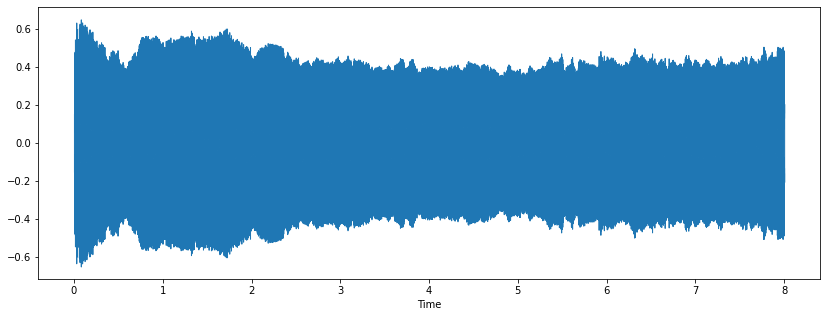

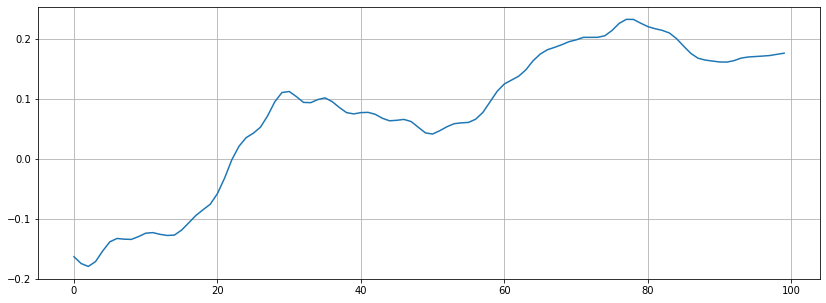

In [54]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(X, sr=sr)

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(X[n0:n1])
plt.grid()

In [55]:
zero_crossings = librosa.zero_crossings(X[n0:n1], pad=False)
print(sum(zero_crossings))


1


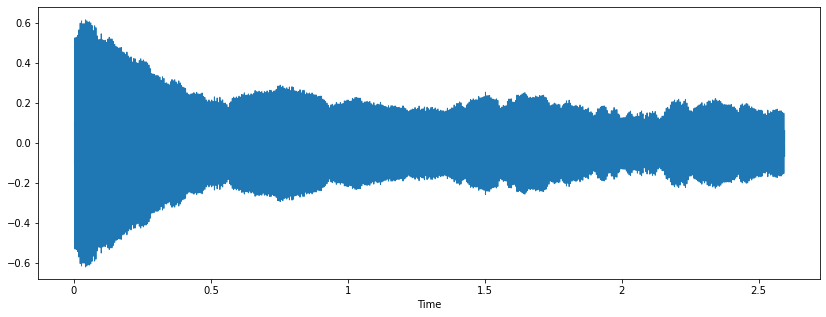

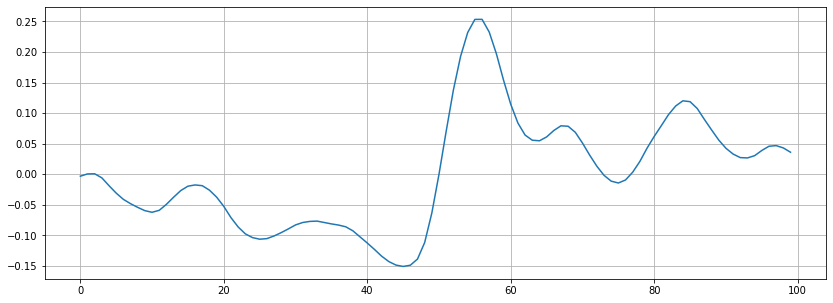

In [56]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(Y, sr=sr)

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(Y[n0:n1])
plt.grid()

In [57]:
zero_crossings = librosa.zero_crossings(Y[n0:n1], pad=False)
print(sum(zero_crossings))

5


In [67]:
librosa.feature.spectral_centroid

<function librosa.feature.spectral.spectral_centroid(*, y=None, sr=22050, S=None, n_fft=2048, hop_length=512, freq=None, win_length=None, window='hann', center=True, pad_mode='constant')>

In [68]:
spectral_centroids = librosa.feature.spectral_centroid(Y, sr=sr)[0]
spectral_centroids.shape

C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/642114742.py:1: FutureWarning: Pass y=[-0.02485395 -0.00026123  0.0485547  ... -0.05112857 -0.0495162
 -0.05600389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(Y, sr=sr)[0]


(112,)

In [69]:
spectral_centroids = librosa.feature.spectral_centroid(X, sr=sr)[0]
spectral_centroids.shape

C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/1590228885.py:1: FutureWarning: Pass y=[0.10450191 0.1527293  0.12184222 ... 0.18793075 0.18574814 0.20520689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(X, sr=sr)[0]


(345,)

In [70]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [71]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

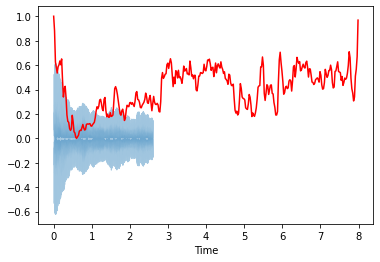

In [72]:
librosa.display.waveshow(Y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

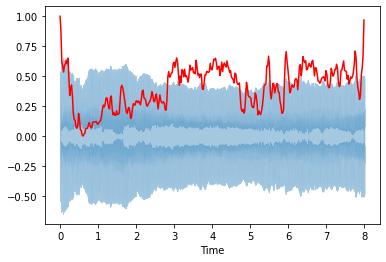

In [73]:
librosa.display.waveshow(X, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/66469245.py:1: FutureWarning: Pass y=[0.11450191 0.16272931 0.13184223 ... 0.19793075 0.19574815 0.21520689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(X+0.01, sr=sr)[0]


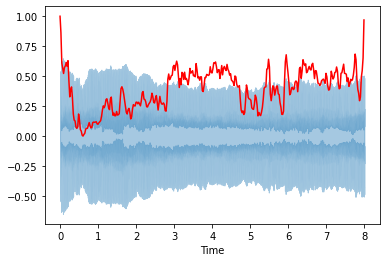

In [74]:
spectral_centroids = librosa.feature.spectral_centroid(X+0.01, sr=sr)[0]
librosa.display.waveshow(X, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

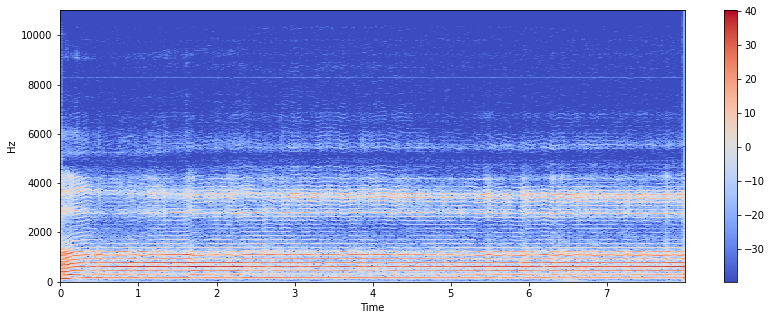

In [75]:
F = librosa.stft(X)
Xdb = librosa.amplitude_to_db(abs(F))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

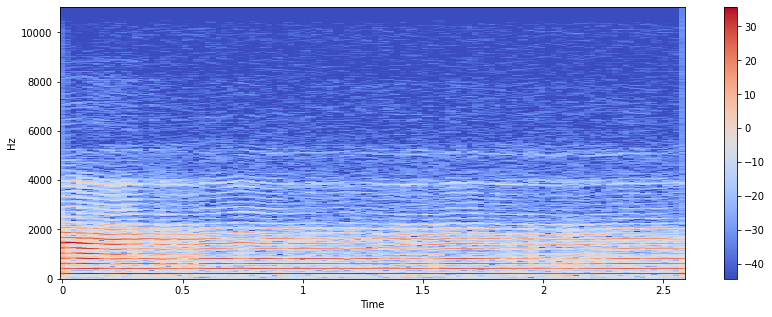

In [76]:
a = librosa.stft(Y)
Xdb = librosa.amplitude_to_db(abs(a))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# SPECTRAL BANDWIDTH

In [77]:
librosa.feature.spectral_bandwidth


<function librosa.feature.spectral.spectral_bandwidth(*, y=None, sr=22050, S=None, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='constant', freq=None, centroid=None, norm=True, p=2)>

In [78]:
spectral_bandwidths = librosa.feature.spectral_bandwidth(Y, sr=sr)[0]
spectral_bandwidths.shape

C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/1473873721.py:1: FutureWarning: Pass y=[-0.02485395 -0.00026123  0.0485547  ... -0.05112857 -0.0495162
 -0.05600389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidths = librosa.feature.spectral_bandwidth(Y, sr=sr)[0]


(112,)

In [79]:
spectral_bandwidths= librosa.feature.spectral_bandwidth(X, sr=sr)[0]
spectral_bandwidths.shape

C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/930274634.py:1: FutureWarning: Pass y=[0.10450191 0.1527293  0.12184222 ... 0.18793075 0.18574814 0.20520689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidths= librosa.feature.spectral_bandwidth(X, sr=sr)[0]


(345,)

In [80]:
frames = range(len(spectral_bandwidths))
u = librosa.frames_to_time(frames)

In [81]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

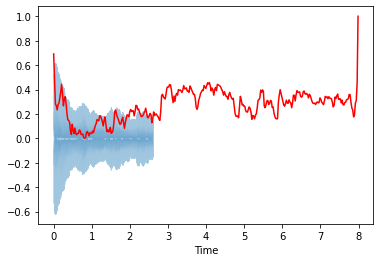

In [82]:
librosa.display.waveshow(Y, sr=sr, alpha=0.4)
plt.plot(u, normalize(spectral_bandwidths), color='r')

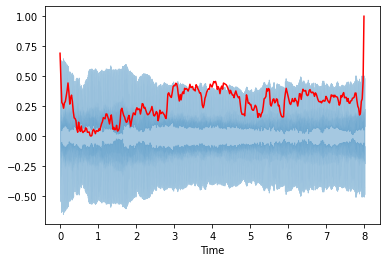

In [83]:
librosa.display.waveshow(X, sr=sr, alpha=0.4)
plt.plot(u, normalize(spectral_bandwidths), color='r')

# SPECTRAL BANDWIDTH

C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/1584805356.py:1: FutureWarning: Pass y=[0.11450191 0.16272931 0.13184223 ... 0.19793075 0.19574815 0.21520689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr)[0]
C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/1584805356.py:2: FutureWarning: Pass y=[0.11450191 0.16272931 0.13184223 ... 0.19793075 0.19574815 0.21520689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr, p=3)[0]
C:\Users\Hari\AppData\Local\Temp/ipykernel_8588/1584805356.py:3: FutureWarning: Pass y=[0.11450191 0.16272931 0.13184223 ... 0.19793075 0.19574815 0.21520689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(X+0.01, sr=

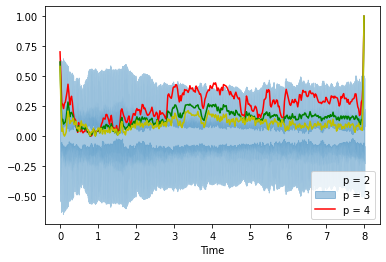

In [84]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(X+0.01, sr=sr, p=4)[0]
librosa.display.waveshow(X, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))